# Crypto Style Analysis Presentation

Our purpose is to perform Style Analysis, as proposed by Sharpe, on the top cryptocurrencies by market capitalization. We will try to explain the daily returns of Binance to token (BNB-USD), Cardano (ADA-USD), DOGE coin (DOGE-USD), LITE coin (LTC-USD), Ripple coin (XRP-USD) based on the returns of Bitcoin (BTC-USD), Etherium (ETH-USD) and Gold (GC=F) as benchmarks. The time period used in this analysis is from 2019-05-01 to 2024-07-31. The data is obtained from Yahoo Finance concerning the daily returns for the mentioned period.

In [1]:
# Add the directory containing the functions to the system
import os
import sys
module_path = os.path.abspath(os.path.join('../crypto_style_analysis'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import itertools
from src.preprocess_data import create_dir
from src.download_data import download_data
from src.preprocess_data import crypto_series_to_process
from src.descriptive_statistics import descriptive_statistics_function
from src.data_analysis import create_adf_result_data_frame, find_non_stationary_series
from src.style_analysis import rolling_style_analysis

In [3]:
# Create the directory to save the data
base_dir = create_dir()
print(base_dir)

/Users/konstantinospapastamatiou/PycharmProjects/data


In [4]:
# Download Data
start_date = '2019-01-01'
end_date = '2024-08-12'
ticker = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BNB-USD', 'DOGE-USD', 'GC=F']
series = []
save_file = True
download_data(path=base_dir, tickers=ticker, fred_tickers=series, from_date=start_date, to_date=end_date,
              save_csv=save_file)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020  3843.520020   
2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424  3943.409424   
2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211  3836.741211   
2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529  3857.717529   
2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580  3845.194580   

                Volume  
Date                    
2019-01-01  4324200990  
2019-01-02  5244856836  
2019-01-03  4530215219  
2019-01-04  4847965467  
2019-01-05  5137609824  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  133.418152  141.397507  132.650711  140.819412  140.819412   
2019-01-02  141.519516  156.929138  140.650955  1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2019-01-01  0.352512  0.364771  0.350402  0.364771   0.364771  449347622
2019-01-02  0.365675  0.378021  0.359574  0.375243   0.375243  543216669
2019-01-03  0.374505  0.374505  0.357675  0.360224   0.360224  438873803
2019-01-04  0.359753  0.364642  0.352785  0.356747   0.356747  450633876
2019-01-05  0.356347  0.361069  0.353987  0.355275   0.355275  452090239
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-01  30.458393  32.097584  30.264280  31.979931  31.979931  379429124
2019-01-02  32.021229  33.793324  31.765974  33.433681  33.433681  414331918
2019-01-03  33.353573  33.420704  31.592480  32.026699  32.026699  345068249
2019-01-04  32.016525  33.023350  31.437557  32.404167  32.404167  391010579
2019-01-05  32.345547  36.1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-01-01  6.191432  6.191929  5.885122  6.075273   6.075273  23891162
2019-01-02  6.091465  6.207873  5.949006  6.188613   6.188613  30308610
2019-01-03  6.171907  6.175116  5.901559  5.903535   5.903535  22821639
2019-01-04  5.895052  6.065898  5.863714  6.065138   6.065138  29311136
2019-01-05  6.055661  6.204376  6.034071  6.065543   6.065543  30340637
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-01-01  0.002346  0.002392  0.002322  0.002392   0.002392  17364744
2019-01-02  0.002388  0.002458  0.002372  0.002407   0.002407  18015392
2019-01-03  0.002404  0.002414  0.002356  0.002360   0.002360  17619234
2019-01-04  0.002364  0.002397  0.002274  0.002315   0.002315  19530100
2019-01-05  0.002320  0.002350  0.002280  0.002319   0.002319  1

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  1286.000000  1286.000000  1277.599976  1281.000000  1281.000000   
2019-01-03  1286.800049  1292.000000  1286.699951  1291.800049  1291.800049   
2019-01-04  1294.199951  1294.199951  1275.300049  1282.699951  1282.699951   
2019-01-07  1286.800049  1286.800049  1286.599976  1286.800049  1286.800049   
2019-01-08  1280.500000  1283.199951  1278.199951  1283.199951  1283.199951   

            Volume  
Date                
2019-01-02     149  
2019-01-03      10  
2019-01-04      34  
2019-01-07       2  
2019-01-08      54  
No fred tickers provided


In [5]:
# Preprocess the data
start_date = '2019-01-03'
end_date = '2024-07-31'
preprocessed_df = crypto_series_to_process(path=base_dir, from_date=start_date, to_date=end_date, save=False)
preprocessed_df.dropna(inplace=True)
preprocessed_df.reset_index(inplace=True, drop=True)

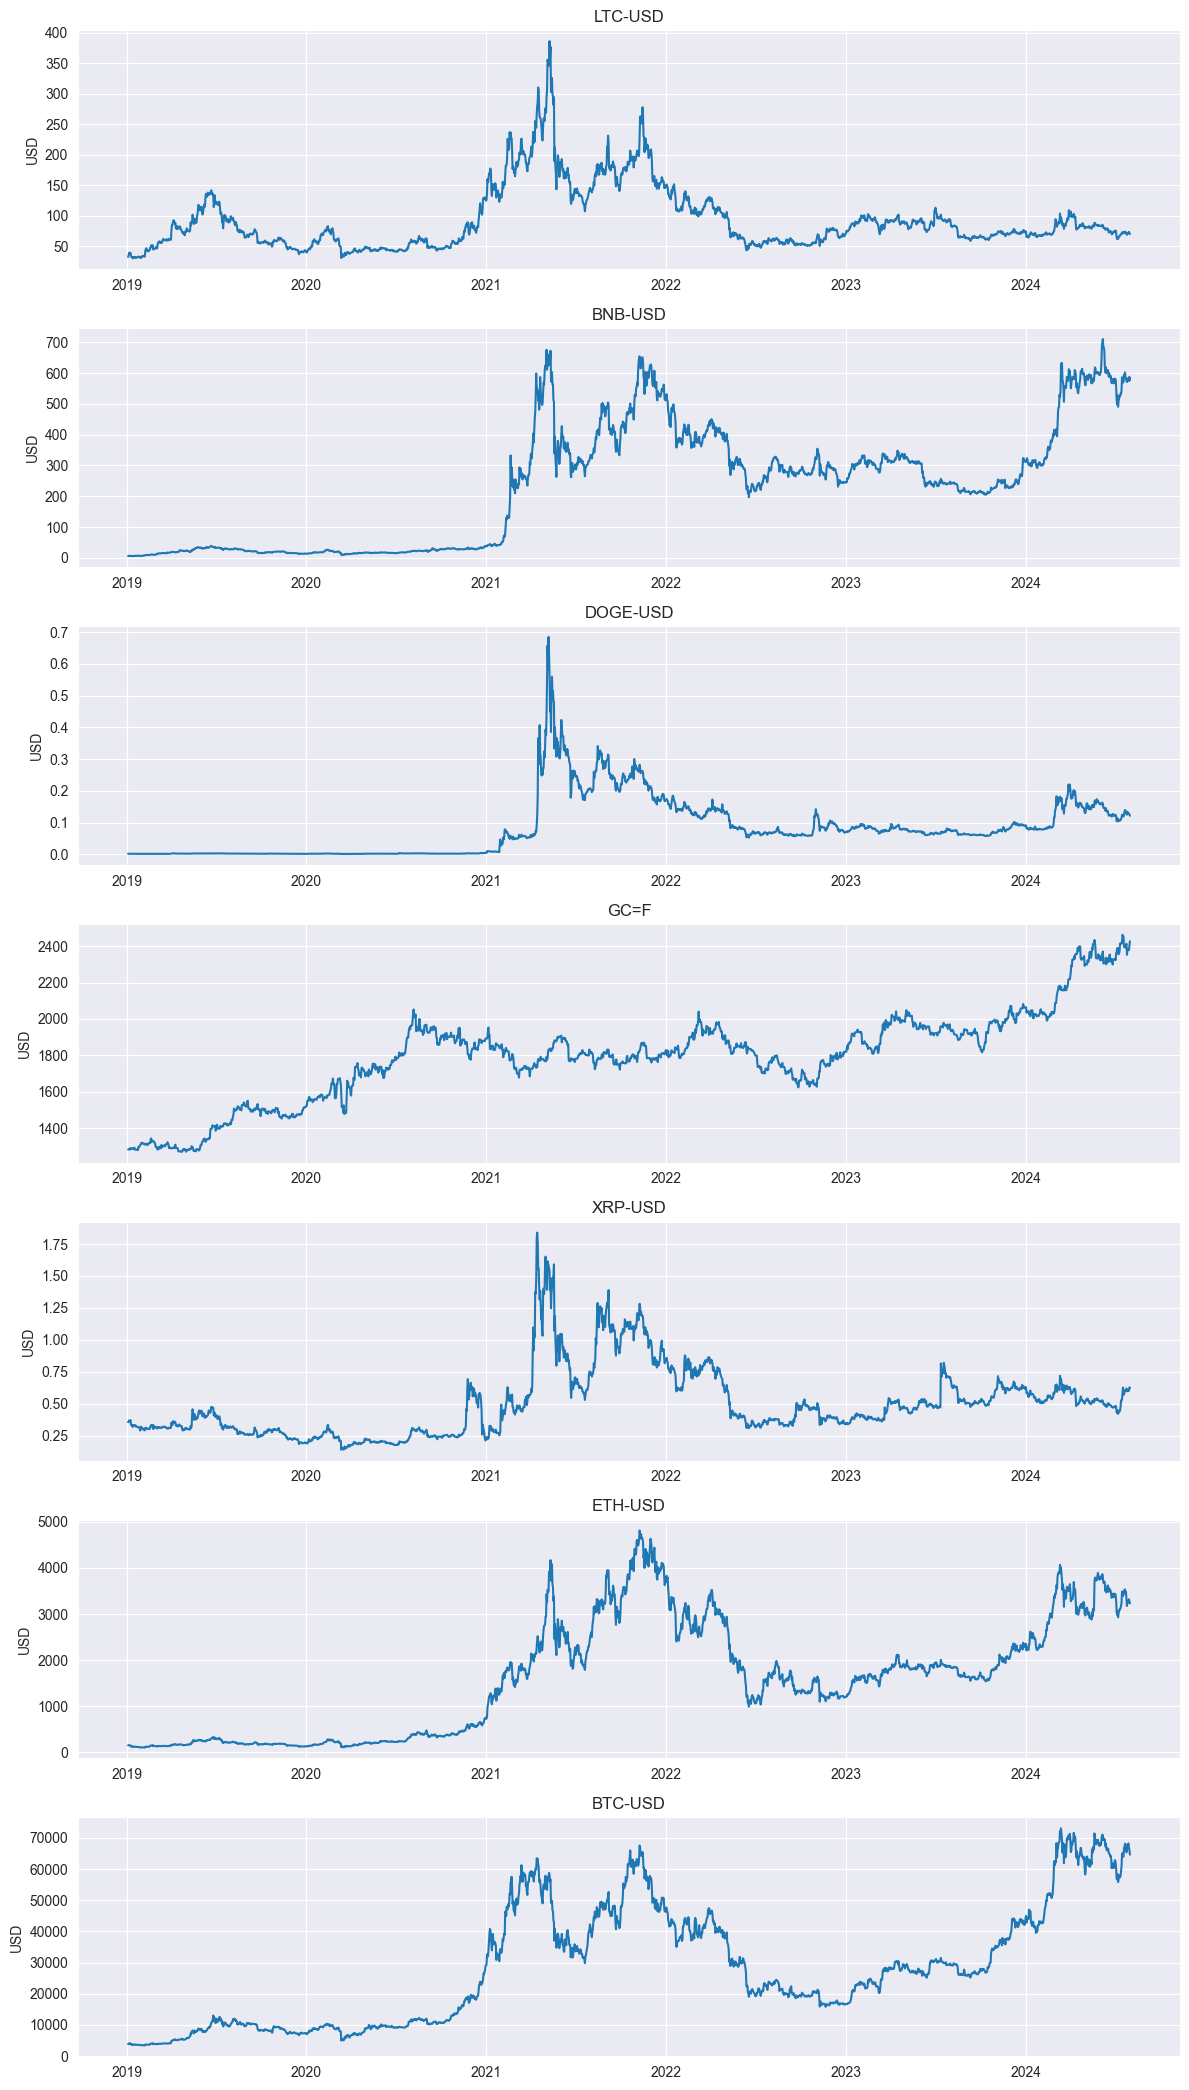

In [6]:
columns = preprocessed_df.loc[:, ~(preprocessed_df.columns.str.contains('log_return') | preprocessed_df.columns.str.contains('Date'))].columns
num_columns = len(columns)

fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(12, 3*num_columns), sharex=True)

for i, col in enumerate(columns):
    axes[i].plot(preprocessed_df['Date'], preprocessed_df[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', which='both', labelbottom=True)
    axes[i].set_ylabel('USD')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Log Returns of the Time Series'}, xlabel='Date'>

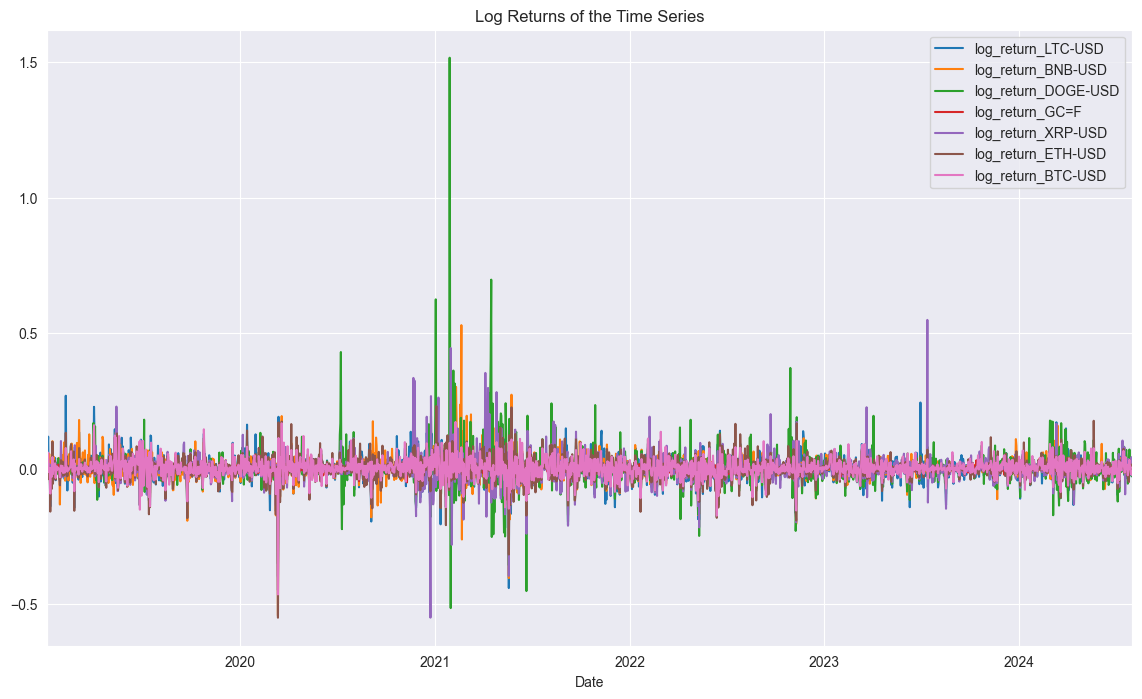

In [7]:
preprocessed_df.plot(x='Date', 
                     y=preprocessed_df.loc[:, preprocessed_df.columns.str.contains('log_return')].columns,
                     figsize=(14,8), 
                     title='Log Returns of the Time Series')

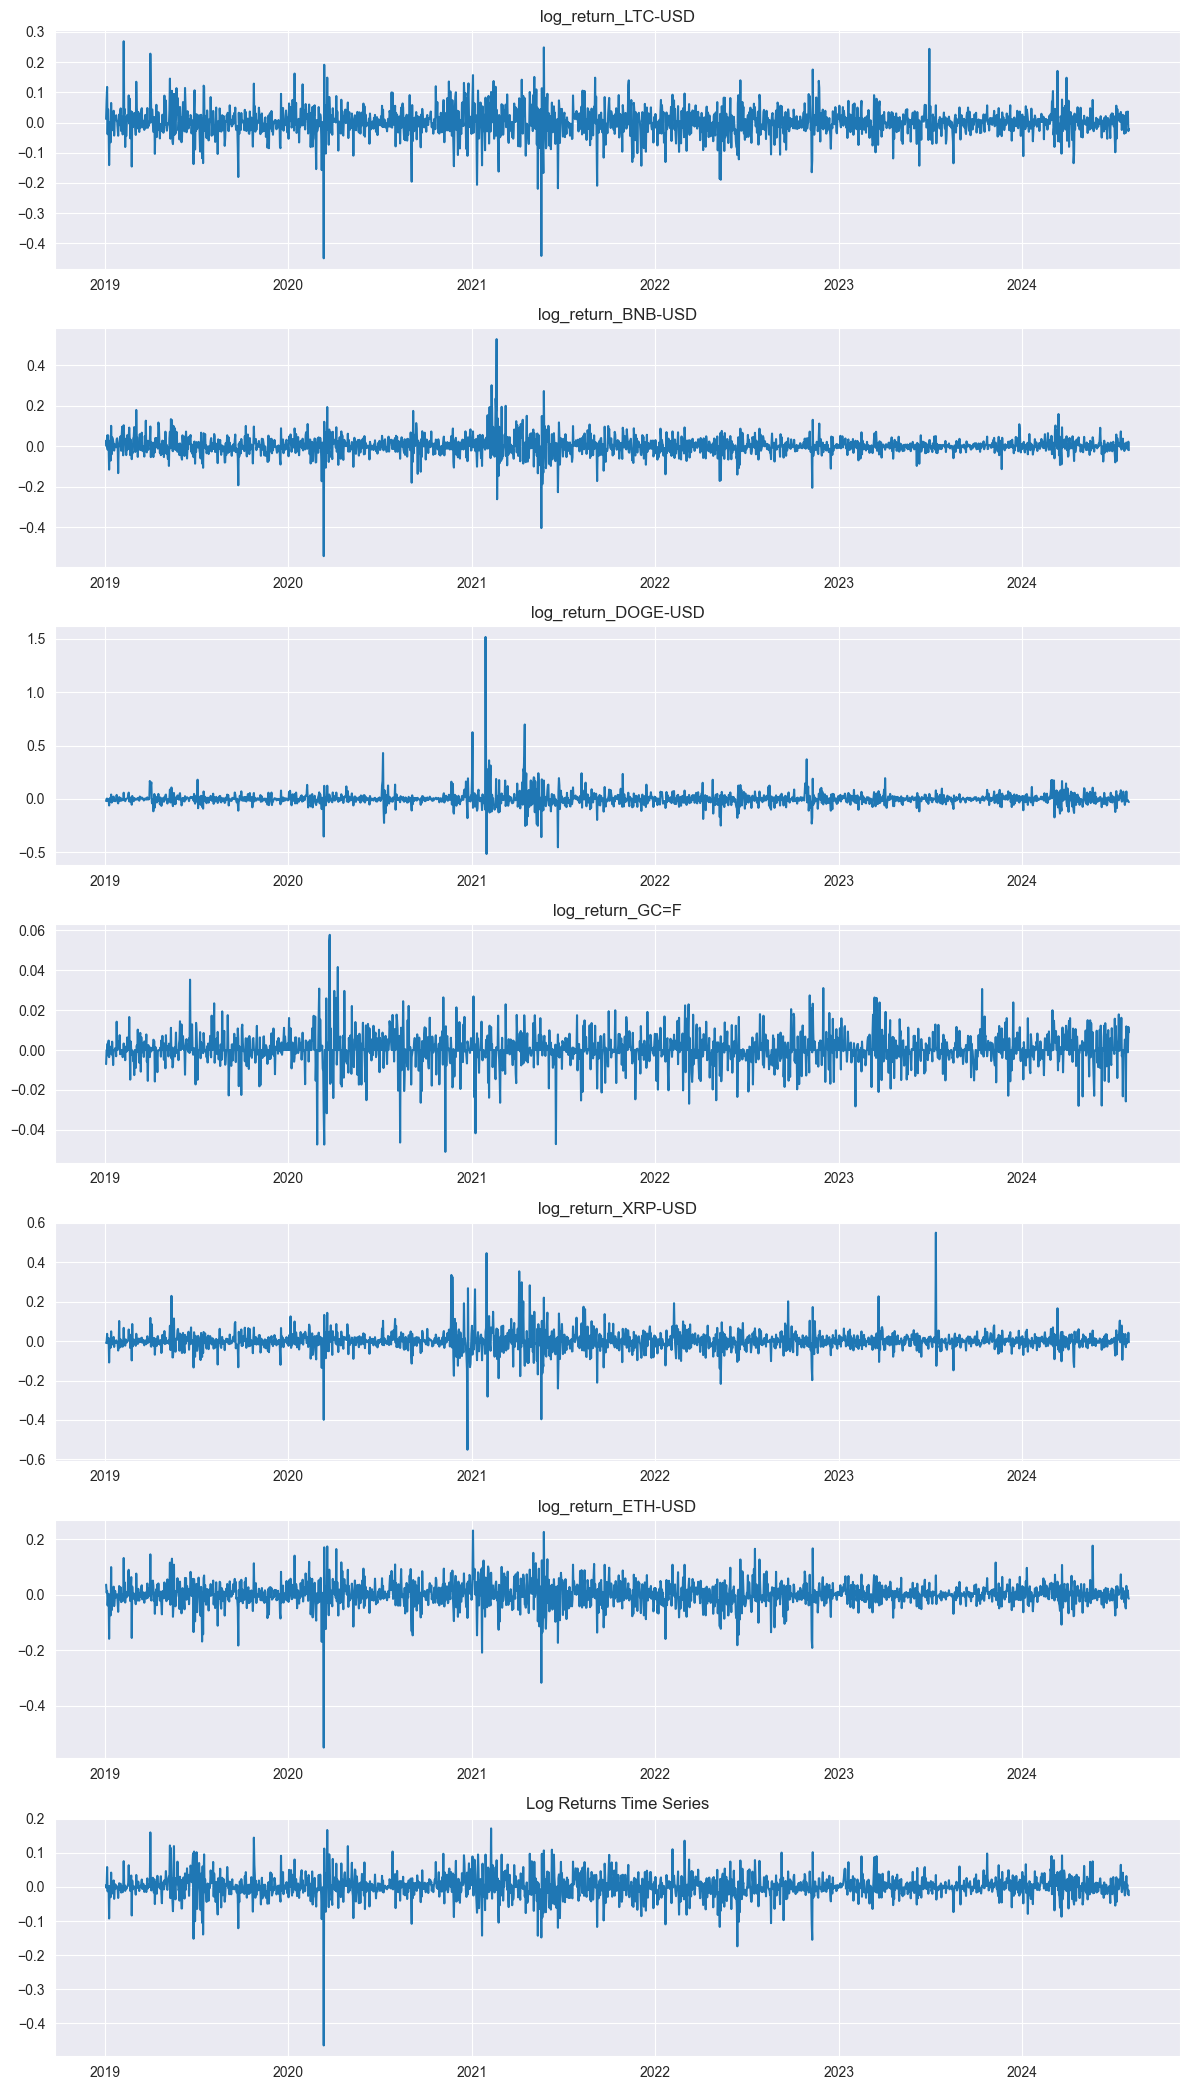

In [8]:
columns = preprocessed_df.loc[:, (preprocessed_df.columns.str.contains('log_return') & (~preprocessed_df.columns.str.contains('Date')))].columns
num_columns = len(columns)

fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(12, 3*num_columns), sharex=True)

for i, col in enumerate(columns):
    axes[i].plot(preprocessed_df['Date'], preprocessed_df[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', which='both', labelbottom=True)

plt.tight_layout()
plt.title('Log Returns Time Series')
plt.show()

In [9]:
# Descriptive Statistics of the time series
descriptive = descriptive_statistics_function(preprocessed_df)
descriptive

,LTC-USD,BNB-USD,DOGE-USD,GC=F,XRP-USD,ETH-USD,BTC-USD,log_return_LTC-USD,log_return_BNB-USD,log_return_DOGE-USD,log_return_GC=F,log_return_XRP-USD,log_return_ETH-USD,log_return_BTC-USD
count,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0
mean,92.995051,233.987563,0.082362,1793.25486,0.498137,1594.918306,28337.873446,0.000385,0.00225,0.001938,0.00031,0.00027,0.001511,0.001387
std,52.515261,192.859568,0.092246,250.668534,0.271939,1236.50751,18930.018756,0.048128,0.047178,0.069763,0.008167,0.052607,0.044133,0.034739
min,30.332897,5.568757,0.001537,1269.300049,0.139635,104.535301,3399.47168,-0.449062,-0.543084,-0.515118,-0.051069,-0.550503,-0.550732,-0.46473
25%,58.277597,24.789163,0.002826,1676.875,0.302403,254.563892,10245.964111,-0.021534,-0.016225,-0.021499,-0.001677,-0.018735,-0.017262,-0.012873
50%,75.92384,247.716934,0.067329,1812.649963,0.446499,1624.736206,25989.014648,0.000825,0.00127,-0.0004,0.0,-0.000064,0.00099,0.000773
75%,108.091114,344.130928,0.122707,1932.599976,0.610395,2454.418579,42266.522461,0.02292,0.021604,0.018597,0.0033,0.018619,0.021812,0.016207
max,386.450775,710.46405,0.684777,2462.399902,1.839236,4812.087402,73083.5,0.268725,0.529218,1.516328,0.057775,0.548555,0.230695,0.171821
skew,1.804222,0.355161,1.814446,-0.054367,1.51606,0.422647,0.555957,-0.741239,-0.201333,6.003788,-0.251663,0.471187,-1.197684,-1.161759
kurtosis,3.876983,-0.954394,4.939078,0.25386,2.657864,-0.878439,-0.797982,10.088124,22.452767,122.259956,7.124379,22.395848,15.771807,18.587782


In [10]:
create_adf_result_data_frame(preprocessed_df)


,log_return_LTC-USD,log_return_BNB-USD,log_return_DOGE-USD,log_return_GC=F,log_return_XRP-USD,log_return_ETH-USD,log_return_BTC-USD
ADF Test Statistic,-20.560608,-12.447756,-7.562301,-46.303856,-47.665255,-13.779449,-21.28023
p-value,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lags Used,4,9,26,0,0,9,3
Number of Observations Used,2031,2026,2009,2035,2035,2026,2032
Critical Values,"{'1%': -3.4335738228216677, '5%': -2.862964123...","{'1%': -3.4335817890636946, '5%': -2.862967640...","{'1%': -3.4336091712699957, '5%': -2.862979729...","{'1%': -3.4335674780489867, '5%': -2.862961321...","{'1%': -3.4335674780489867, '5%': -2.862961321...","{'1%': -3.4335817890636946, '5%': -2.862967640...","{'1%': -3.4335722342837056, '5%': -2.862963421..."
IC Best,-6495.211924,-6594.325774,-5021.40346,-13593.606151,-6119.317506,-6853.252427,-7792.373975
Check Null Hypothesis,Stationary,Stationary,Stationary,Stationary,Stationary,Stationary,Stationary


In [11]:
find_non_stationary_series(preprocessed_df)

All series are stationary at 5% significance level


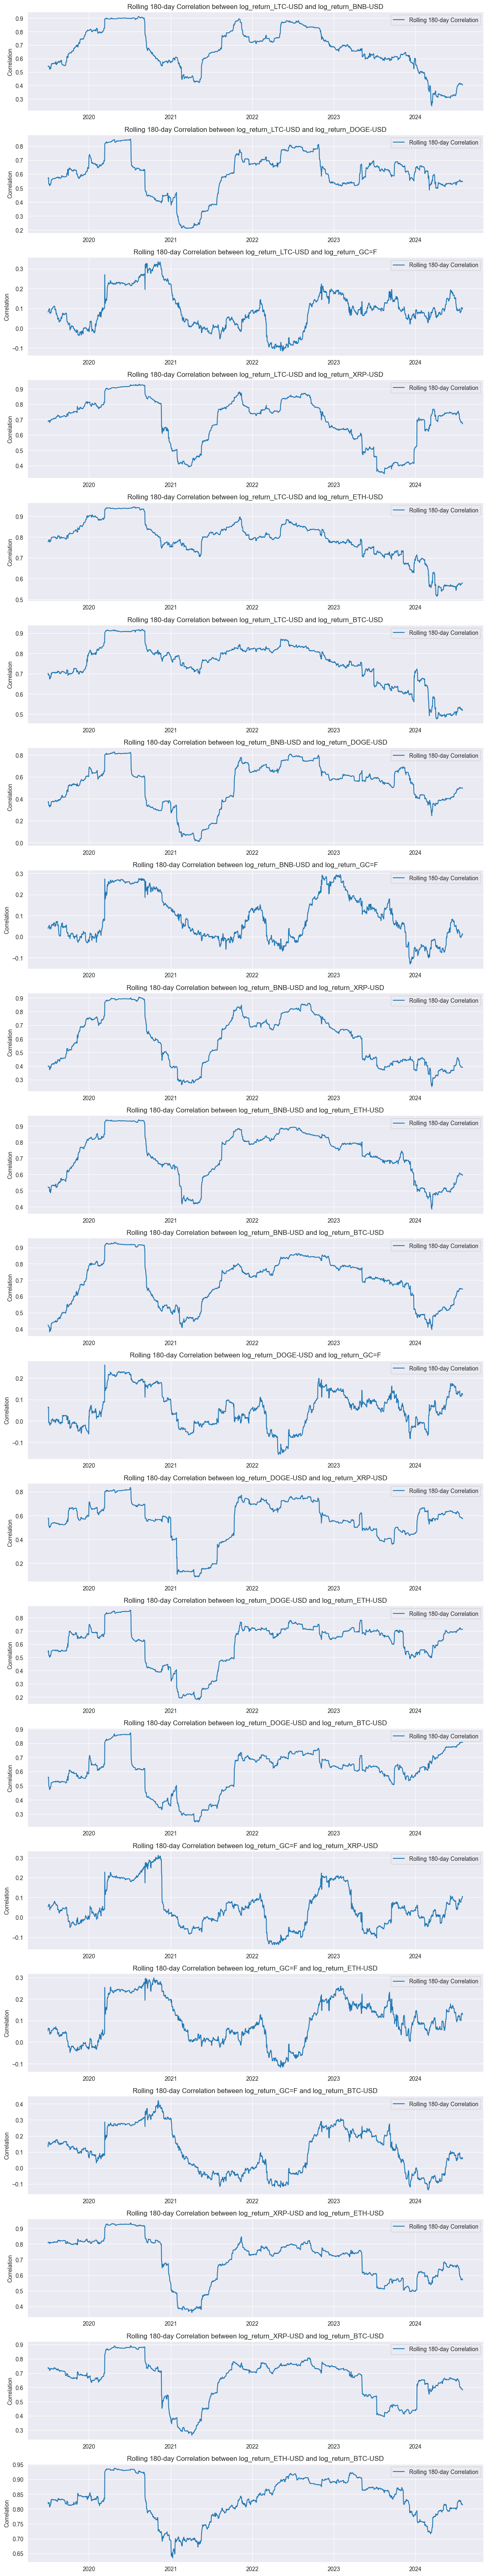

In [12]:
# Calculate the rolling correlation
 # Define the window size for rolling correlation
window_size = 180

# Get all possible pairs of columns
columns = preprocessed_df.columns[preprocessed_df.columns.str.contains('log_return')]
pairs = list(itertools.combinations(columns, 2))

# Plot the rolling correlation for each pair
fig, axes = plt.subplots(nrows=len(pairs), ncols=1, figsize=(12, 3*len(pairs)), sharex=True)

for i, (col1, col2) in enumerate(pairs):
    rolling_corr = preprocessed_df[[col1, col2]].rolling(window=window_size).corr().unstack()
    rolling_corr.dropna(inplace=True)
    if rolling_corr.columns[0][0] == rolling_corr.columns[0][1]:
        rolling_corr = rolling_corr.iloc[:,1]
    else:
        rolling_corr = rolling_corr.iloc[:,0]
    axes[i].plot(preprocessed_df['Date'][window_size-1:], rolling_corr, label=f'Rolling {window_size}-day Correlation')
    axes[i].set_title(f'Rolling {window_size}-day Correlation between {col1} and {col2}')
    axes[i].tick_params(axis='x', which='both', labelbottom=True)
    axes[i].set_ylabel('Correlation')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [13]:
index_cols = ['log_return_BTC-USD', 'log_return_ETH-USD', 'log_return_GC=F']
targets = []
for col in preprocessed_df.columns:
    if (col not in index_cols and col != 'Date') and ('log_return' in col):
        targets.append(col)

solution_list = []
for target in targets:
    sol = rolling_style_analysis(data=preprocessed_df, index_columns=index_cols, target_variable=target, window=window_size, step=1)
    solution_list.append(sol)

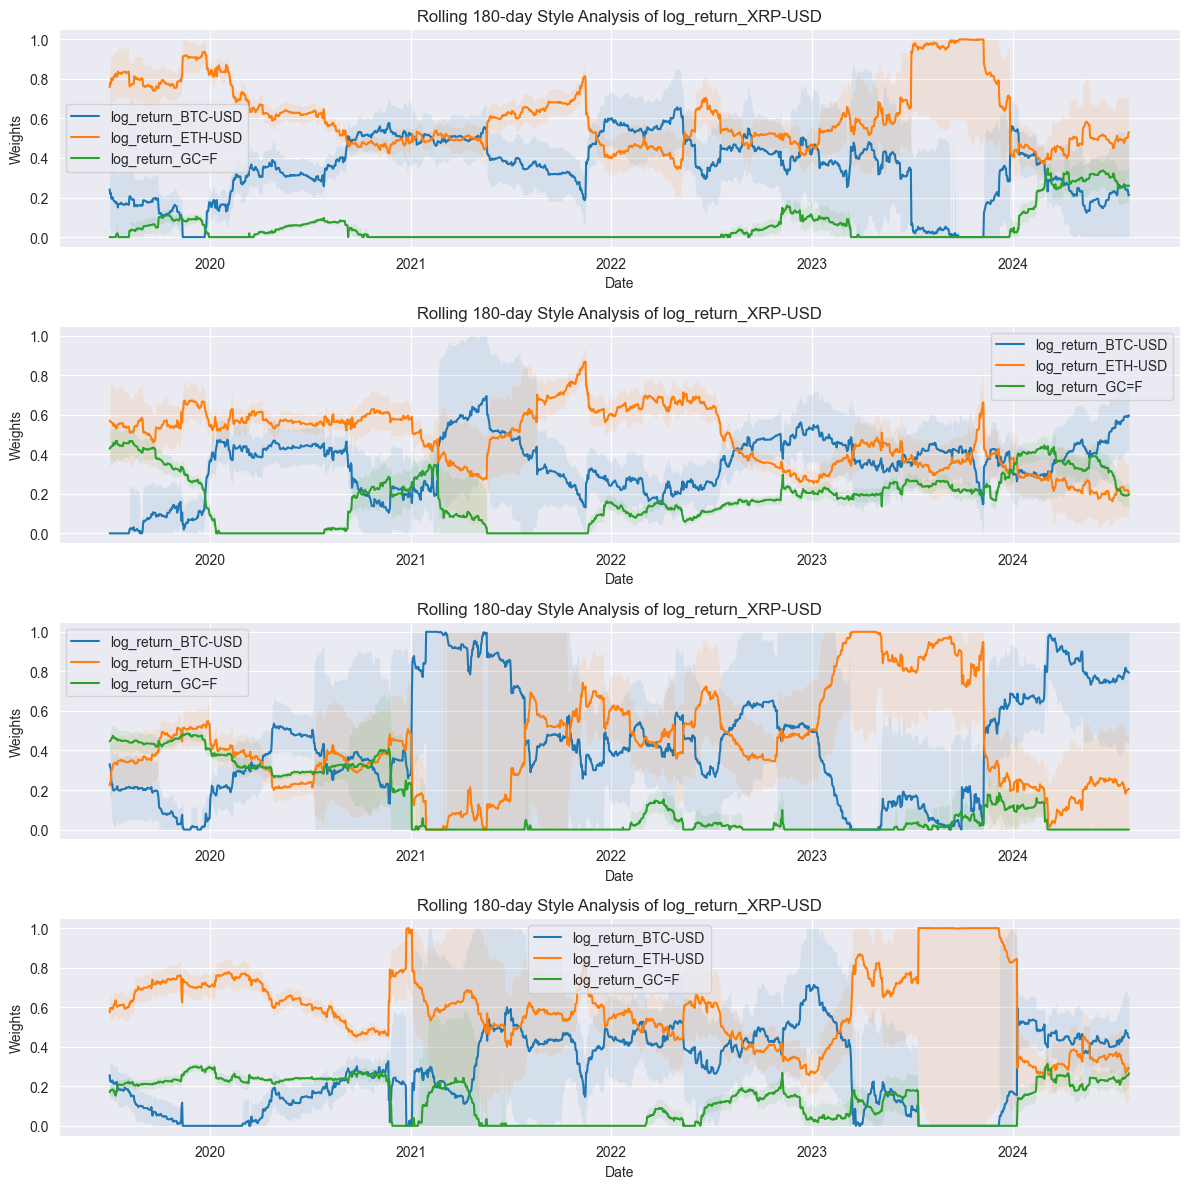

In [14]:
fig, axes = plt.subplots(nrows=len(targets), ncols=1, figsize=(12, 3*len(targets)), sharex=True)

for ix, sol in enumerate(solution_list): 
    columns = sol.loc[:, sol.columns.str.contains('coeff')].columns
    num_columns = len(columns)
    for i, col in enumerate(columns):
        x=sol.index
        y=sol[col]
        y_minus_ci = [sol[f'coeff_{i}'].iloc[ix] - sol[f'conf_interval_{i}'].iloc[ix] if sol[f'coeff_{i}'].iloc[ix] - sol[f'conf_interval_{i}'].iloc[ix] >= 0 else 0 for ix in sol.reset_index(drop=True).index]
        y_plus_ci = [sol[f'coeff_{i}'].iloc[ix] + sol[f'conf_interval_{i}'].iloc[ix] if sol[f'coeff_{i}'].iloc[ix] + sol[f'conf_interval_{i}'].iloc[ix] <= 1 else 1 for ix in sol.reset_index(drop=True).index]
        axes[ix].plot(x,y, label=index_cols[i])
        axes[ix].fill_between(x, y_minus_ci, y_plus_ci, alpha=.1)
        axes[ix].set_title(f'Rolling {window_size}-day Style Analysis of {target}')
        axes[ix].set_xlabel('Date')
        axes[ix].tick_params(axis='x', which='both', labelbottom=True)
        axes[ix].set_ylabel('Weights')
        axes[ix].legend()
        axes[ix].grid(True)
    
plt.tight_layout()
plt.legend()
plt.show()

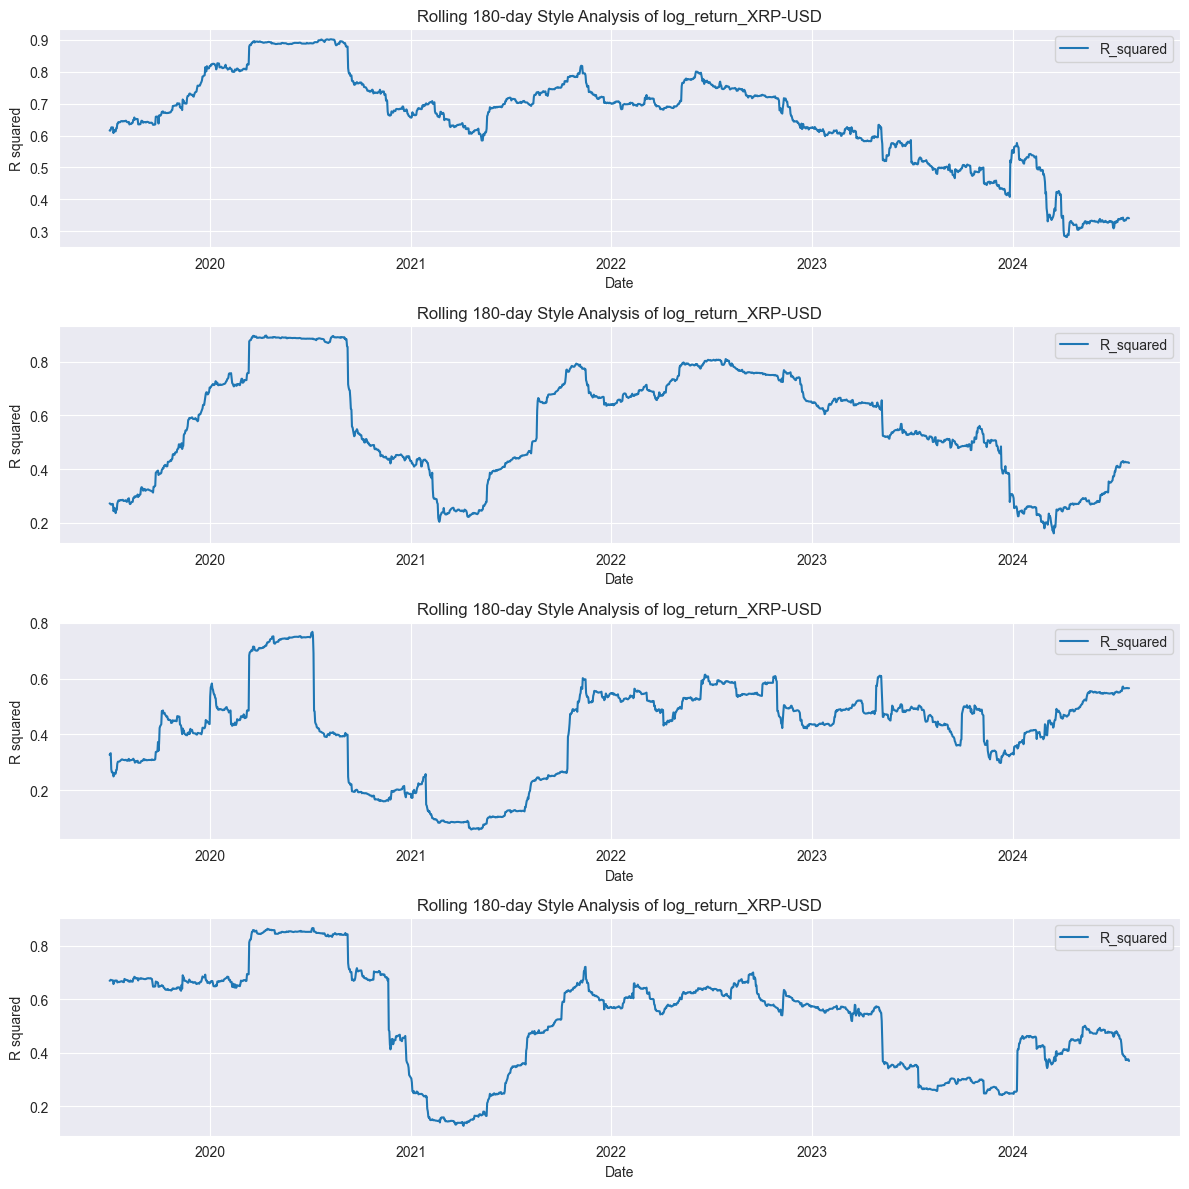

In [15]:
fig, axes = plt.subplots(nrows=len(targets), ncols=1, figsize=(12, 3*len(targets)), sharex=True)

for ix, sol in enumerate(solution_list):
    x = sol.index
    y = sol['R_squared']
    axes[ix].plot(x,y, label='R_squared')
    axes[ix].set_title(f'Rolling {window_size}-day Style Analysis of {target}')
    axes[ix].set_xlabel('Date')
    axes[ix].tick_params(axis='x', which='both', labelbottom=True)
    axes[ix].set_ylabel('R squared')
    axes[ix].legend()
    axes[ix].grid(True)
    
plt.tight_layout()
plt.legend()
plt.show()